# By Prisca

In [79]:
# TSLA  stock prediction using LSTM model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [76]:
#load the data

In [2]:
df=pd.read_csv(r'C:\Users\USER\Documents\dataset\TSLA.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


In [4]:
df.shape

(3534, 7)

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.set_index(['Date'],inplace=True)

In [7]:
df.head() # predicting stock for 2024-7-16, stock start from 2010 to 2024 july

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


In [8]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [77]:
# selection of target column

In [78]:
new_df=df['Close'].values

In [11]:
new_df=pd.DataFrame(new_df)

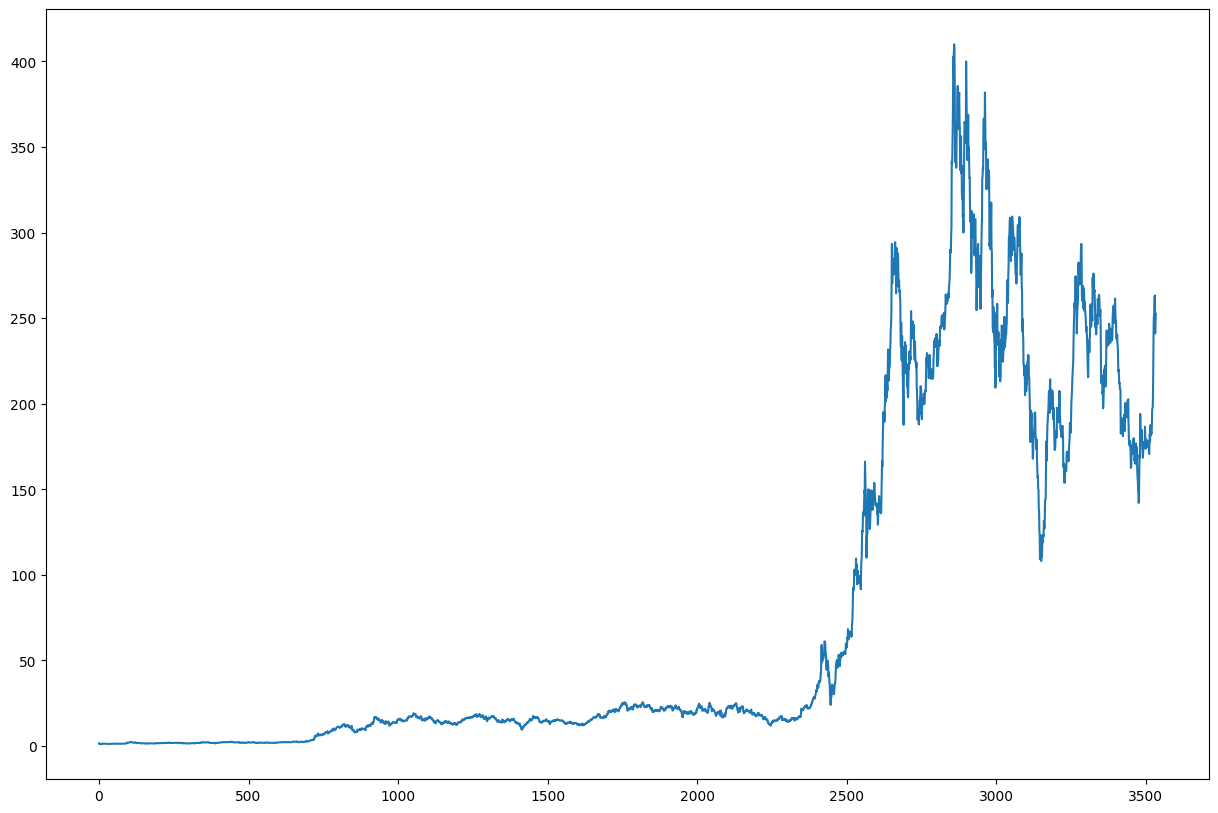

In [12]:
plt.figure(figsize=(15,10))
plt.plot(new_df)

In [80]:
# data scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))

In [15]:
df_scaled=scaler.fit_transform(new_df)

In [16]:
# split the data

In [98]:
split_index=int(len(df_scaled)*0.8)

In [99]:
train_df=df_scaled[:split_index]
test_df=df_scaled[split_index:]

In [100]:
train_df.shape,test_df.shape

((2827, 1), (707, 1))

In [101]:
# created sequence for both train and test data

In [102]:
x_train=[]
y_train=[]

for i in range(60,len(train_df)):
    x_train.append(train_df[i-60:i, 0])
    y_train.append(train_df[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

In [103]:
x_test=[]
y_test=[]

for i in range(60,len(test_df)):
    x_test.append(test_df[i-60:i,0])
    y_test.append(test_df[i,0])

x_test=np.array(x_test)
y_test=np.array(y_test)

In [104]:
x_train.shape,x_test.shape

((2767, 60), (647, 60))

In [105]:
y_train.shape,y_test.shape

((2767,), (647,))

# reshape

In [106]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [107]:
x_train.shape,x_test.shape

((2767, 60, 1), (647, 60, 1))

# build model

In [29]:
from keras .models import Sequential
from keras .layers import Dense,Dropout,LSTM

In [30]:
model=Sequential()

In [31]:
model.add(LSTM(units=50,return_sequences=True,input_shape=( x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))

In [32]:

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [33]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [34]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [35]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [36]:
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

In [37]:
model.add(Dense(units=1))

In [ ]:
# compile

In [39]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [40]:
#fit the model

In [41]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=2)

Epoch 1/20
1384/1384 [==============================] - 300s 202ms/step - loss: 0.0024 - val_loss: 0.0149
Epoch 2/20
1384/1384 [==============================] - 281s 203ms/step - loss: 0.0014 - val_loss: 0.0110
Epoch 3/20
1384/1384 [==============================] - 279s 201ms/step - loss: 0.0012 - val_loss: 0.0102
Epoch 4/20
1384/1384 [==============================] - 273s 197ms/step - loss: 0.0010 - val_loss: 0.0100
Epoch 5/20
1384/1384 [==============================] - 278s 201ms/step - loss: 9.9633e-04 - val_loss: 0.0259
Epoch 6/20
1384/1384 [==============================] - 283s 205ms/step - loss: 8.8110e-04 - val_loss: 0.0090
Epoch 7/20
1384/1384 [==============================] - 274s 198ms/step - loss: 8.3555e-04 - val_loss: 0.0090
Epoch 8/20
1384/1384 [==============================] - 281s 203ms/step - loss: 7.4407e-04 - val_loss: 0.0094
Epoch 9/20
1384/1384 [==============================] - 274s 198ms/step - loss: 8.6287e-04 - val_loss: 0.0077
Epoch 10/20
1384/1384 [===

In [90]:
#model evaluation

In [108]:
loss_t=(history.history['loss'])
loss_v=(history.history['val_loss'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


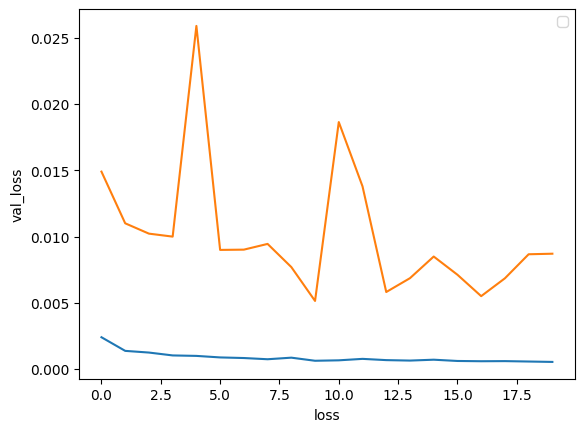

In [109]:
plt.plot(loss_t)
plt.plot(loss_v)
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend()  # as the val loss is going down, the loss is low too

# prediction

In [110]:
predictions=model.predict(x_test)

21/21 [==============================] - 2s 88ms/step


In [111]:
predictions=scaler.inverse_transform(predictions)

In [112]:
predictions.shape

(647, 1)

In [113]:
# Reshape y_test

In [114]:
y_test=y_test.reshape(-1,1)

In [115]:
y_test.shape

(647, 1)

In [116]:
y_test_sc=scaler.inverse_transform(y_test)

In [117]:
y_test_sc.shape,predictions.shape

((647, 1), (647, 1))

# stock visualization

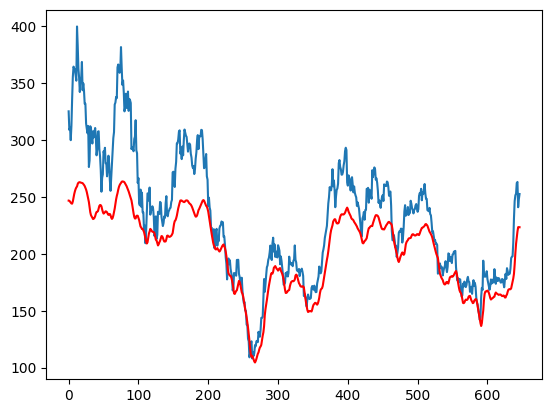

In [119]:
plt.plot(y_test_sc)
plt.plot(predictions,color='red') # trend highly copied

In [56]:
#evaluation

In [120]:
from sklearn .metrics import mean_squared_error

In [121]:
rmse=np.sqrt(mean_squared_error(y_test_sc,predictions))

In [122]:
rmse # the error is high but what matter is the trend is quite captured,if i train it more, the error will reduce

38.148803216812006

# lets predict the next day that is 2024-7-16

In [123]:
# reload the data

In [124]:
df=pd.read_csv(r'C:\Users\USER\Documents\dataset\TSLA.csv')

In [125]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
3529,3529,2024-07-09,251.000000,265.609985,250.300003,262.329987,160210900
3530,3530,2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400
3531,3531,2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300
3532,3532,2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400
3533,3533,2024-07-15,255.964996,265.579987,251.729996,252.639999,142831728


In [87]:
# chose the target varaible

In [126]:
new_df=df['Close']

In [127]:
# select the last 60 days

In [128]:
last_60_days=new_df[-60:]

In [129]:
last=pd.DataFrame(last_60_days)

In [130]:
last.shape

(60, 1)

In [131]:
last_days=scaler.transform(last)

C:\Users\USER\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [89]:
#created sequence and append the 60 days

In [132]:
x_test=[]
x_test.append(last_days)

x_test=np.array(x_test)

In [133]:
x_test.shape

(1, 60, 1)

In [134]:
#reshape

In [135]:
x_predict=model.predict(x_test)

1/1 [==============================] - 0s 71ms/step


In [136]:
x_predict=scaler.inverse_transform(x_predict)

In [138]:
x_predict #stock price for 2024-7-16

array([[223.94717]], dtype=float32)